In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
%matplotlib inline

In [4]:
data=pd.read_csv('C:/Users/harsh/Desktop/Data Science-20231209T103625Z-001/Data Science/Minor Project/Minor Project Dataset_train.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
 5   Volume  1009 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.4+ KB


In [6]:
data['Close']=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData=data.iloc[:,4:5].values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
 5   Volume  1009 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.4+ KB


In [8]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1009, 1)

In [9]:
x_train=[]
y_train=[]

for i in range(60,1009):
    x_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [10]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(949, 60, 1)

In [13]:
model=Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1],1)))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
hist=model.fit(x_train,y_train,epochs=20,batch_size=32,verbose=2)

Epoch 1/20
30/30 - 11s - loss: 0.0331 - 11s/epoch - 369ms/step
Epoch 2/20
30/30 - 4s - loss: 0.0054 - 4s/epoch - 118ms/step
Epoch 3/20
30/30 - 3s - loss: 0.0048 - 3s/epoch - 107ms/step
Epoch 4/20
30/30 - 4s - loss: 0.0048 - 4s/epoch - 136ms/step
Epoch 5/20
30/30 - 3s - loss: 0.0044 - 3s/epoch - 108ms/step
Epoch 6/20
30/30 - 3s - loss: 0.0044 - 3s/epoch - 100ms/step
Epoch 7/20
30/30 - 3s - loss: 0.0042 - 3s/epoch - 99ms/step
Epoch 8/20
30/30 - 3s - loss: 0.0039 - 3s/epoch - 98ms/step
Epoch 9/20
30/30 - 3s - loss: 0.0036 - 3s/epoch - 98ms/step
Epoch 10/20
30/30 - 3s - loss: 0.0039 - 3s/epoch - 94ms/step
Epoch 11/20
30/30 - 3s - loss: 0.0036 - 3s/epoch - 97ms/step
Epoch 12/20
30/30 - 3s - loss: 0.0035 - 3s/epoch - 96ms/step
Epoch 13/20
30/30 - 3s - loss: 0.0034 - 3s/epoch - 104ms/step
Epoch 14/20
30/30 - 3s - loss: 0.0032 - 3s/epoch - 110ms/step
Epoch 15/20
30/30 - 4s - loss: 0.0033 - 4s/epoch - 123ms/step
Epoch 16/20
30/30 - 3s - loss: 0.0030 - 3s/epoch - 114ms/step
Epoch 17/20
30/30 - 3

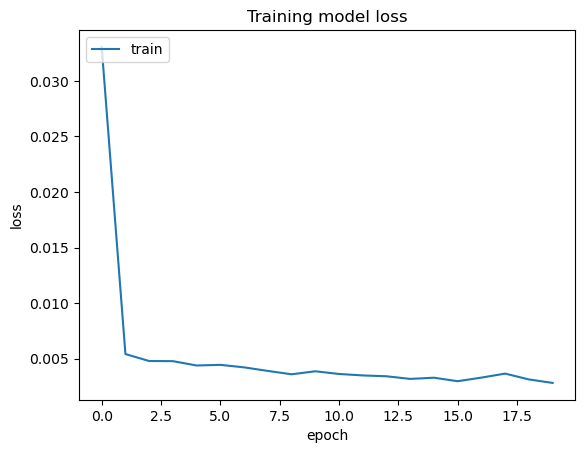

In [15]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [19]:
testdata=pd.read_csv('C:/Users/harsh/Desktop/Data Science-20231209T103625Z-001/Data Science/Minor Project/Minor Project Dataset_test.csv')
testdata['Close']=pd.to_numeric(testdata.Close,errors='coerce')
testdata=testdata.dropna()
testdata=testdata.iloc[:,4:5]
y_test=testdata.iloc[60:,0:].values
inputClosing = testdata.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
x_test=[]
length=len(testdata)
timestep=60
for i in range(timestep,length):
    x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(949, 60, 1)

In [21]:
y_pred=model.predict(x_test)

30/30 [==============================] - 1s 36ms/step


In [22]:
predicted_price=sc.inverse_transform(y_pred)

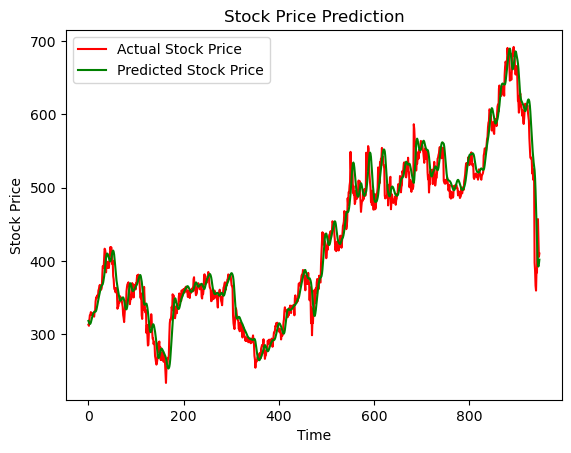

In [23]:
plt.plot(y_test,color='red',label='Actual Stock Price')
plt.plot(predicted_price,color='green',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()